In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
from requests import get

result = get('https://openenergy-platform.org/api/v0/schema/supply/tables/wind_turbine_library/rows')
json_res = result.json()

{'id': 0, 'turbine_id': 1, 'manufacturer': 'Enercon', 'name': 'E-141/4200 EP 4', 'turbine_type': 'E-141/4200', 'nominal_power': 4200, 'rotor_diameter': '141', 'rotor_area': '15613', 'hub_height': '99; 129; 135; 159', 'max_speed_drive': '11.0', 'wind_class_iec': 'IEC/EN IIA', 'wind_zone_dibt': 'WZ3 GK I; WZ3 GK I', 'power_density': '269.0', 'power_density_2': '3.7', 'calculated': True, 'has_power_curve': True, 'power_curve_wind_speeds': '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]', 'power_curve_values': '[0.0, 22.0, 104.0, 260.0, 523.0, 920.0, 1471.0, 2151.0, 2867.0, 3481.0, 3903.0, 4119.0, 4196.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0, 4200.0]', 'has_cp_curve': True, 'power_coefficient_curve_wind_speeds': '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 

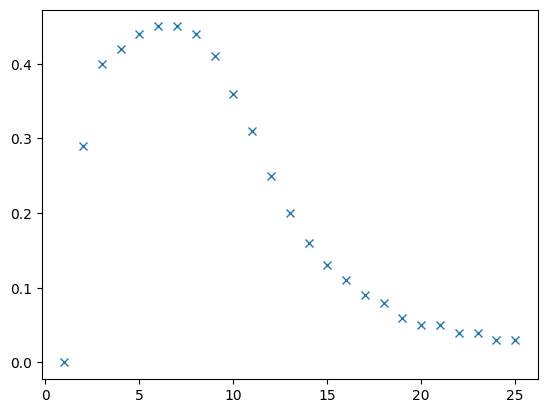

In [24]:
enercon_e141 = json_res[0]
print(enercon_e141)

wind_speeds = np.array(json.loads(enercon_e141['power_coefficient_curve_wind_speeds']), dtype=float)
curve_values = np.array(json.loads(enercon_e141['power_coefficient_curve_values']), dtype=float)

plt.plot(wind_speeds, curve_values, 'x') 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [21]:
Xs = wind_speeds.reshape((-1, 1))
Ys = curve_values

x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(Xs)

model = LinearRegression()
model.fit(x_, Ys)

r_sq = model.score(x_, Ys)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9043288310584009


In [22]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 0.03284110671938434
slope: [ 0.12987031 -0.01252013  0.00029761]


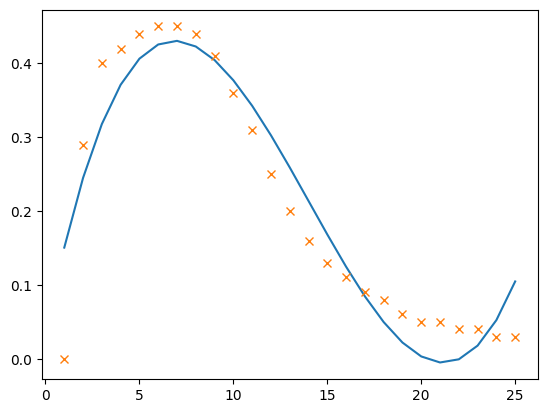

In [23]:
preds = model.predict(x_)
plt.plot(Xs, preds)
plt.plot(wind_speeds, curve_values, 'x') 
